## N-Gram Rendering and Evaluation Graphics

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (12, 8) 

In [3]:
%store -r exp1_data
%store -r exp2_data
%store -r exp3_data
%store -r exp4_data

columns = ['Name','Acc', 'Pre', 'Rec', 'F1', 'R', 'K', 'MAE']
data = [
    ['N1'] + exp1_data['apcf'] + [exp1_data['r'], exp1_data['k'], exp1_data['mae']],
    ['N2'] + exp2_data['apcf'] + [exp2_data['r'], exp2_data['k'], exp2_data['mae']],
    ['N3'] + exp3_data['apcf'] + [exp3_data['r'], exp3_data['k'], exp3_data['mae']],
    ['N4'] + exp4_data['apcf'] + [exp4_data['r'], exp4_data['k'], exp4_data['mae']]
]

df = pd.DataFrame(data, columns=columns)
df.head()
df.to_csv('../tmp/ngram_experiment_scores_class6.csv',sep='~')

In [12]:
%store -r exp3_data
%store -r exp5_data
%store -r exp6_data

columns = ['Name','Acc', 'Pre', 'Rec', 'F1', 'R', 'K', 'MAE']
data = [
    ['MA1'] + exp3_data['apcf'] + [exp3_data['r'], exp3_data['k'], exp3_data['mae']],
    ['MA2'] + exp5_data['apcf'] + [exp5_data['r'], exp5_data['k'], exp5_data['mae']],
    ['MA3'] + exp6_data['apcf'] + [exp6_data['r'], exp6_data['k'], exp6_data['mae']]
]

df2 = pd.DataFrame(data, columns=columns)
df2.head()
df2.to_csv('../tmp/ngram_experiment_model_answer_scores.csv',sep='~')

In [14]:
df2

Name       Acc       Pre       Rec        F1         R         K       MAE
0  MA1  0.152736  0.452899  0.152736  0.201456  0.355192  0.021455  1.846766
1  MA2  0.210448  0.463083  0.210448  0.261565  0.421350  0.051409  1.414925
2  MA3  0.242289  0.467032  0.242289  0.292493  0.448927  0.070731  1.227861

/home/che/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


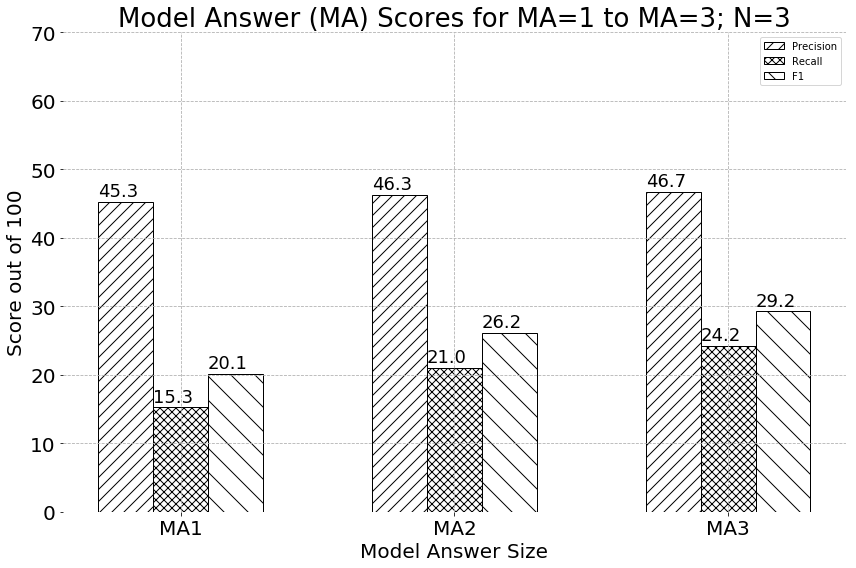

In [13]:
from cycler import cycler

# Styles
monochrome = (cycler('color', ['k']) * cycler('linestyle',
                                              ['-', '--', ':', '=.']) * cycler('marker', ['^', ',', '.']))
bar_cycle = (cycler('hatch', ['///', '--', '...', '\///', 'xxx',
                              '\\\\']) * cycler('color', 'w')*cycler('zorder', [10]))
styles = bar_cycle()


def render_aprf(data, filename, ylim):

    fig, ax = plt.subplots(1, 1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_prop_cycle(monochrome)

    x = np.arange(len(data))
    
    # Grid Setup
    ax.grid(linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Labels
    ax.set_title('Model Answer (MA) Scores for MA=1 to MA=3; N=3', size=26)
    ax.set(xlabel='Model Answer Size')
    ax.xaxis.label.set_fontsize(20)
    ax.xaxis.padlabel = 40
    ax.set(ylabel='Score out of 100')
    ax.yaxis.label.set_fontsize(20)
    
    labels = ['Precision', 'Recall', 'F1']

    # Render
    plt.ylim([0,ylim])
    ax.bar(x, width=0.2, height=data['Pre'] * 100, hatch='//', fill=False)
    ax.bar(x+0.2, width=0.2, height=data['Rec'] * 100, hatch='xxx', fill=False)
    ax.bar(x+0.4, width=0.2, height=data['F1'] * 100, hatch='\\', fill=False)
    plt.legend('best', labels=labels)
    
    plt.xticks(x + 0.2, data['Name'])
    
    # Add numeric values
    pos = []
    pos.append(x)
    pos.append(x+0.2)
    pos.append(x+0.4)
    pos = np.array(pos)
    
    x_pos = pd.DataFrame(pos.T, columns=['pre_pos', 'rec_pos', 'f1_pos'])
    for i in range(0, len(data)):
        pre_v = data.iloc[i]['Pre']*100
        plt.text(x=x_pos['pre_pos'].iloc[i]-0.1, y=pre_v+0.8, s='{:.1f}'.format(pre_v), size=18)
        
        rec_v = data.iloc[i]['Rec']*100
        plt.text(x=x_pos['rec_pos'].iloc[i]-0.1, y=rec_v+0.8, s='{:.1f}'.format(rec_v), size=18)
        
        f1_v = data.iloc[i]['F1']*100
        plt.text(x=x_pos['f1_pos'].iloc[i]-0.1, y=f1_v+0.8, s='{:.1f}'.format(f1_v), size=18)
    
    plt.tight_layout()
    plt.savefig('../renderings/{}.png'.format(filename))
    plt.show()
    
render_aprf(df2, filename='model_answers_accuracy', ylim=70)